Life Expectancy Data is a dataset that contains life expectancy, health, immunization, economic, and demographic information. The purpose in this analysis is to build a model that can predict the life expectancy using the given information

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [2]:
from google.colab import files


uploaded = files.upload()

Saving Life-Expectancy-Data-Updated.csv to Life-Expectancy-Data-Updated.csv


In [3]:
df=pd.read_csv('Life-Expectancy-Data-Updated.csv')

In [4]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [5]:
df.shape

(2864, 21)

In [6]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

From the informations above, it can be seen that the dataset consists of 19 variables that are numeric and 2 variables that are string.

In [8]:
df['Year'] = df['Year'] - 2000

In [9]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,15,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,15,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,7,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,6,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,12,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


### Data Distribution

In [10]:
df['Country'].value_counts()

Turkiye            16
Slovak Republic    16
Latvia             16
Angola             16
Jamaica            16
                   ..
Kuwait             16
Argentina          16
Panama             16
Oman               16
Georgia            16
Name: Country, Length: 179, dtype: int64

In [11]:
df['Region'].value_counts()

Africa                           816
European Union                   432
Asia                             432
Central America and Caribbean    304
Rest of Europe                   240
Middle East                      224
South America                    192
Oceania                          176
North America                     48
Name: Region, dtype: int64

In [12]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,7.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,0.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,3.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,7.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,11.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,15.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


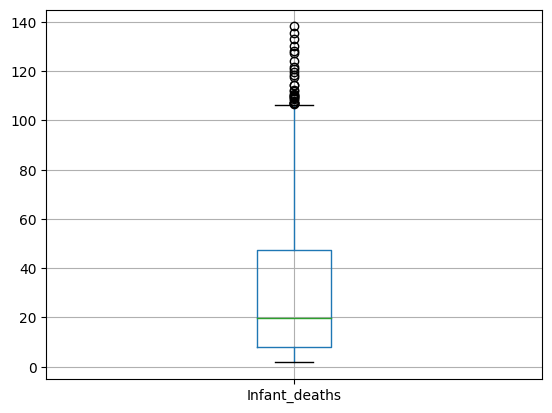

In [13]:
boxplot = df.boxplot(column='Infant_deaths')

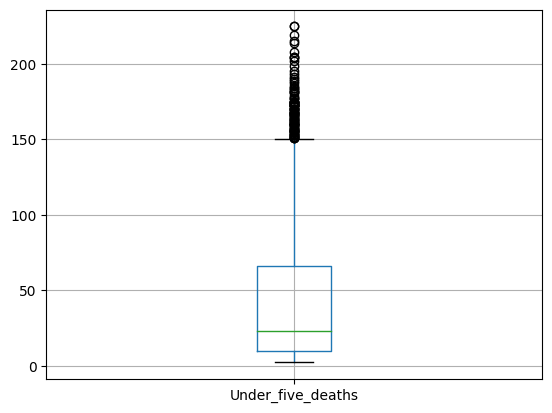

In [14]:
boxplot = df.boxplot(column='Under_five_deaths')

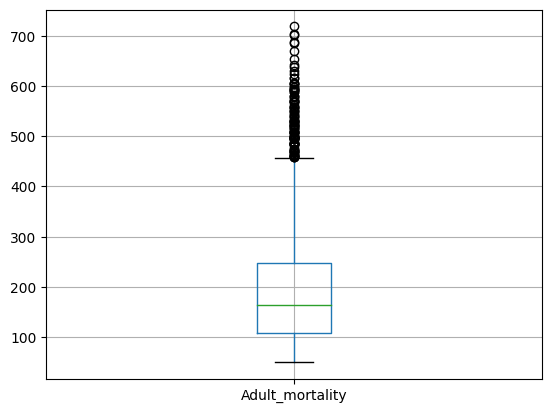

In [15]:
boxplot = df.boxplot(column='Adult_mortality')

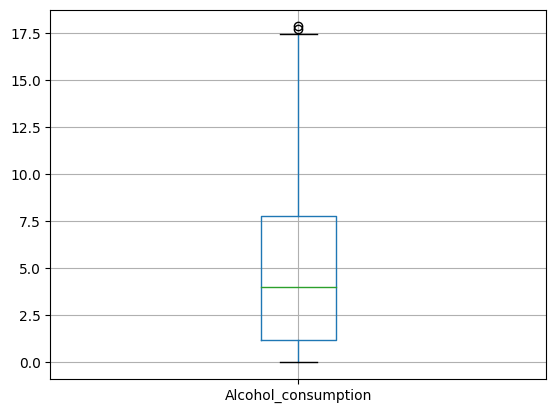

In [16]:
boxplot = df.boxplot(column='Alcohol_consumption')

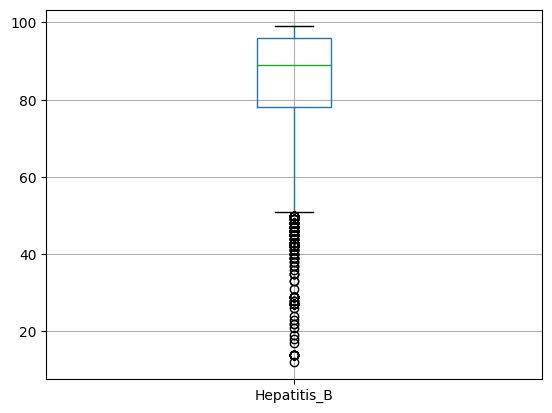

In [17]:
boxplot = df.boxplot(column='Hepatitis_B')

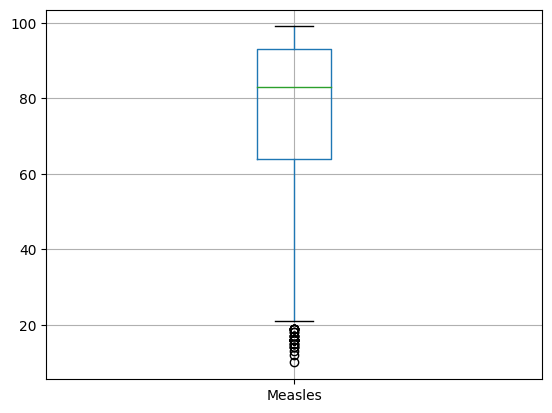

In [18]:
boxplot = df.boxplot(column='Measles')

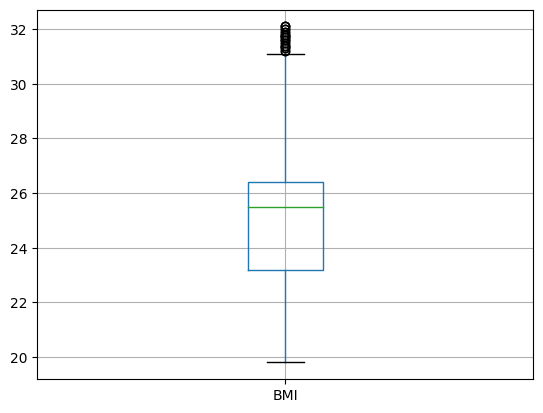

In [19]:
boxplot = df.boxplot(column='BMI')

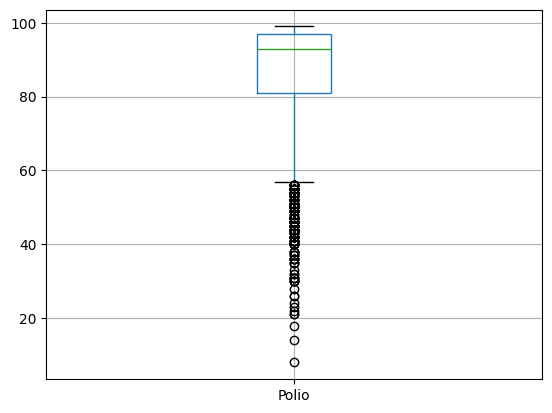

In [20]:
boxplot = df.boxplot(column='Polio')

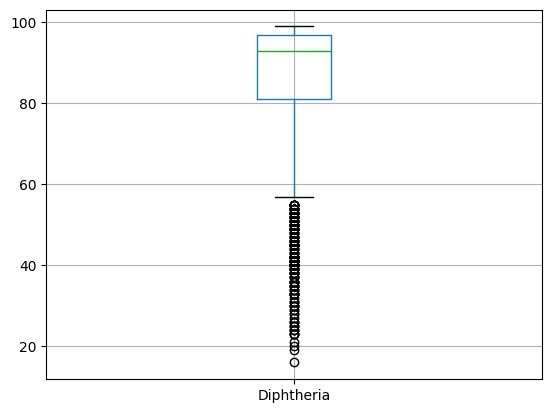

In [21]:
boxplot = df.boxplot(column='Diphtheria')

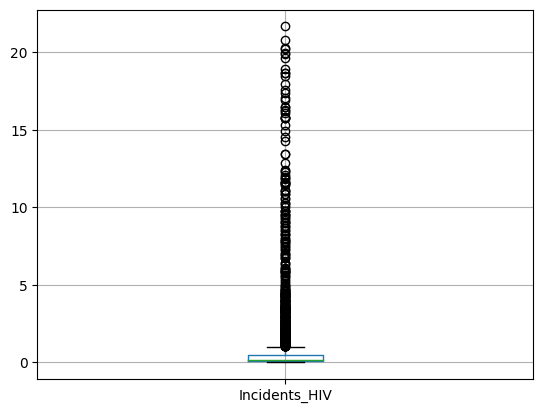

In [22]:
boxplot = df.boxplot(column='Incidents_HIV')

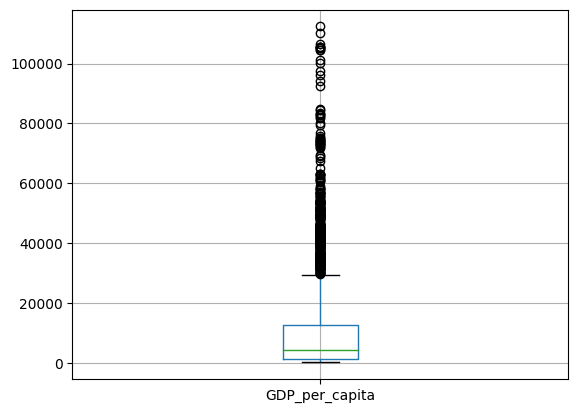

In [23]:
boxplot = df.boxplot(column='GDP_per_capita')

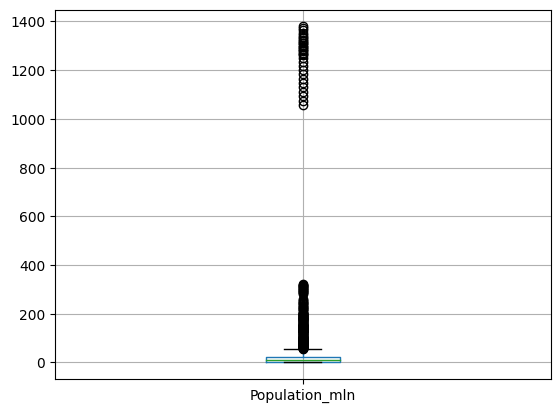

In [24]:
boxplot = df.boxplot(column='Population_mln')

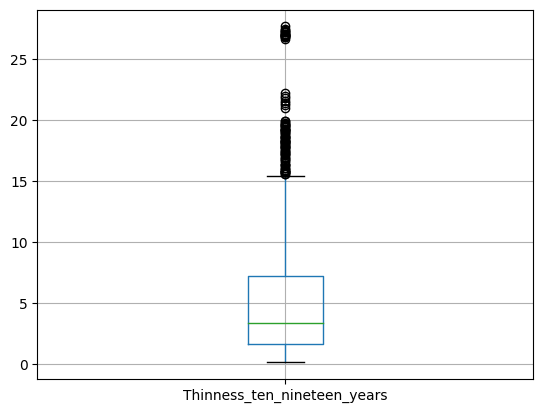

In [25]:
boxplot = df.boxplot(column='Thinness_ten_nineteen_years')

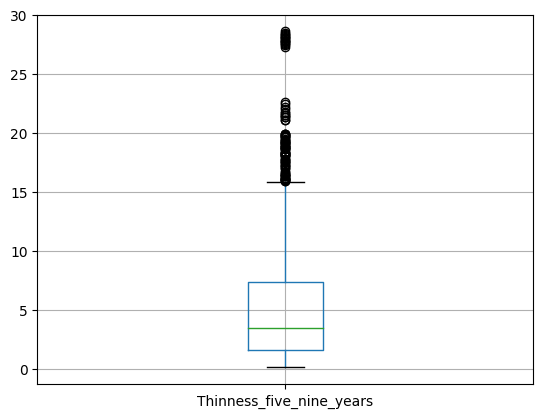

In [26]:
boxplot = df.boxplot(column='Thinness_five_nine_years')

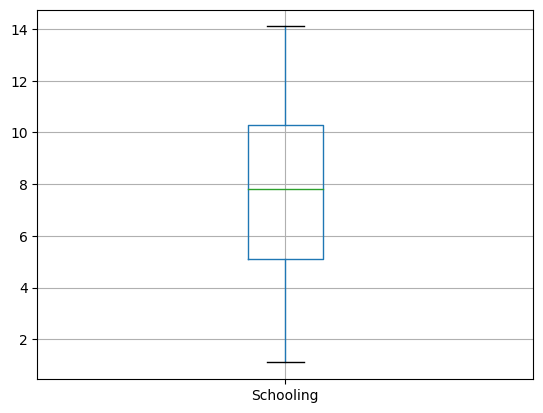

In [27]:
boxplot = df.boxplot(column='Schooling')

### Splitting Data

The dataset is splitted into 80% training data and 20% testing data.

In [28]:
input_df=df.drop('Life_expectancy',axis=1)
output_df=df['Life_expectancy']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

### Feature Engineering

Because Region and Country are categorical variables, it should be encoded into numerical variables by using frequency encoding.

In [30]:
def features_encode(data,features):
    freq_encoding=data.groupby(features).size()/len(data)
    return freq_encoding

x_train['Region']=x_train['Region'].map(features_encode(x_train,x_train['Region']))
x_test['Region']=x_test['Region'].map(features_encode(x_test,x_test['Region']))

x_train['Country']=x_train['Country'].map(features_encode(x_train,x_train['Country']))
x_test['Country']=x_test['Country'].map(features_encode(x_test,x_test['Country']))

### Modeling - Bagging

For the modeling, we use Bagging as it can helps to reduce variance and improve the overall performance of the model. Also, it is robust to outliers to some extent.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.filterwarnings('ignore')

Bagging_class = BaggingRegressor(oob_score = True)
Bagging_class.fit(x_train, y_train)

BaggingRegressor(oob_score=True)

In [32]:
Bagging_class.oob_score_

0.653075071316298

In [33]:
y_predict=Bagging_class.predict(x_test)

In [34]:
y_train_predict = Bagging_class.predict(x_train)

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('MAE Test =',mean_absolute_error(y_test, y_predict))
print('MSE Test =',mean_squared_error(y_test, y_predict))
print('R squared Test =',r2_score(y_test, y_predict))

MAE Test = 0.5211867364746944
MSE Test = 0.5137040139616046
R squared Test = 0.9938101390232


In [36]:
print('MAE Train =',mean_absolute_error(y_train, y_train_predict))
print('MSE Train =',mean_squared_error(y_train, y_train_predict))
print('R squared Train =',r2_score(y_train, y_train_predict))

MAE Train = 0.1829113924050633
MSE Train = 0.0797333478830204
R squared Train = 0.9991118897597467


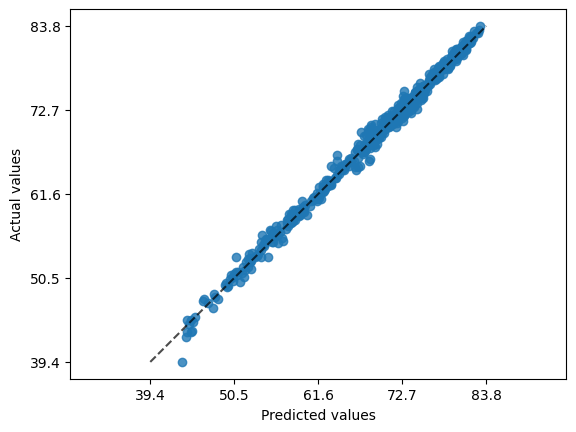

In [37]:
from sklearn.metrics import PredictionErrorDisplay
disp = PredictionErrorDisplay.from_predictions(y_test, y_predict, kind = 'actual_vs_predicted')
plt.show()

### Feature Scaling

There are some variables that have bigger scale than the other. Therefore, we perform feature scaling to reduce the scale, so every variables have a similar scale.

In [38]:
x_train.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
2026,0.005238,0.147097,14,7.9,9.3,111.2825,2.45,99,99,22.9,99,99,0.01,3694,20.78,15.2,15.0,10.9,0,1
651,0.005238,0.149716,4,3.7,4.6,114.2985,13.42,98,98,26.6,96,98,0.08,14070,10.20,2.1,2.2,11.6,1,0
2225,0.005674,0.070275,14,15.4,18.0,143.0785,6.60,78,83,26.6,79,78,0.40,16056,30.04,1.6,1.5,10.0,0,1
2357,0.006111,0.086862,10,11.8,13.3,80.9365,4.88,99,98,26.1,99,99,0.03,3577,2.91,1.4,1.5,9.3,0,1
670,0.005674,0.290266,3,43.3,74.4,495.7265,2.29,83,64,23.2,82,79,9.74,3298,1.88,14.2,14.3,5.8,0,1


In [39]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
columns_to_scale = ['Adult_mortality', 'GDP_per_capita', 'Population_mln','Infant_deaths','Under_five_deaths','Hepatitis_B','Measles']
x_train[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale] = scaler.transform(x_test[columns_to_scale])

### Bagging after Scaling

In [40]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.filterwarnings('ignore')

Bagging_class = BaggingRegressor(oob_score = True)
Bagging_class.fit(x_train, y_train)

BaggingRegressor(oob_score=True)

In [41]:
Bagging_class.oob_score_

0.47792875121484835

In [42]:
y_predict=Bagging_class.predict(x_test)

In [43]:
y_train_predict = Bagging_class.predict(x_train)

In [44]:
print('MAE Test =',mean_absolute_error(y_test, y_predict))
print('MSE Test =',mean_squared_error(y_test, y_predict))
print('R squared Test =',r2_score(y_test, y_predict))

MAE Test = 0.49094240837696274
MSE Test = 0.46372897033158755
R squared Test = 0.9944123117996861


In [45]:
print('MAE Train =',mean_absolute_error(y_train, y_train_predict))
print('MSE Train =',mean_squared_error(y_train, y_train_predict))
print('R squared Train =',r2_score(y_train, y_train_predict))

MAE Train = 0.17359668267132297
MSE Train = 0.07380257529463112
R squared Train = 0.999177949695874


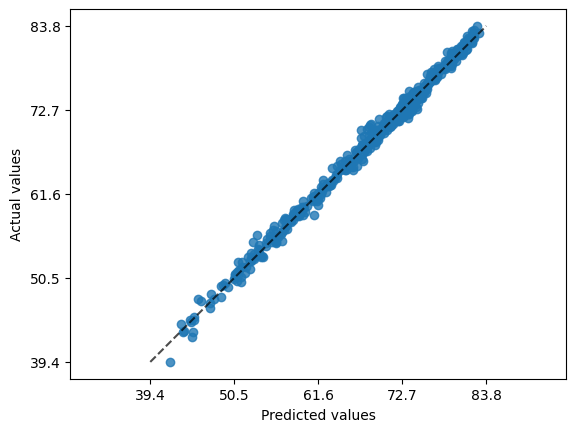

In [46]:
from sklearn.metrics import PredictionErrorDisplay
disp = PredictionErrorDisplay.from_predictions(y_test, y_predict, kind = 'actual_vs_predicted')
plt.show()